# Amazon Review Classification

In this question we will be studying a data set containing the information regarding purchases done through Amazon and their corresponding reviews. We will be using the Machine Learning technique called Natual Language Processing to classify the information given for which we will be assigning categories to the open ended text. 

We will base our analysis on the file 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle, which contains the following variables:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We will try to classify the reviews in order to predict the rating obtained after each purchase.

## 1. Appetizer: Data Analysis

### Data download

In [1]:
# In this cell, we will import all the required packages to perform our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load train and test sets
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [3]:
# Overview of train set
train.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


In [4]:
# Overview of test set
test.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"Samsung 32GB Galaxy Note 10.1"" Android 4G LTE ...",NaN,499.99,4,The speed of this tablet is unreal! It is by f...,24.0
1,Kyocera Hydro C5170 PrePaid - Boost Mobile,NaN,27.47,4,i had been shopping for a smart phone from boo...,1.0
2,"Apple iPhone 6 Plus Unlocked Cellphone, 16GB, ...",Apple,519.00,1,I would not recommend this phone.. It has a lo...,0.0
3,HTC One M8 - Factory Unlocked 32GB - US Warran...,HTC,138.99,1,NOT UNLOCKED!!!!! beware!!! Also as soon as I ...,NaN
4,T-Mobile Prepaid LG GS170 No-Contract Mobile P...,LG,299.99,5,This phone is a gift for my 80's something fri...,0.0


In [5]:
# Shapes of train, validation and test sets
print(train.shape, test.shape)

(5000, 6) (1000, 6)


As we can see, the train set is comprised by 5,000 observations while the test set is comprised by 1,000. This proportion means that we will be training our models on around 83.33% of the data sample. The standard is normally between 80% and 70%. We hope this proportion help us to have a more accurate classification model with out falling in an overfitting of the data.

#### Question 1
##### Tokenization

Our first step will be to prepare the data. When you are working with open ended text, there are several modifications to the original data set that have to be implemented. The objetive of this changes is to keep only the turthly relevant information and to not duplicate information. 

The first of this steps to prepare our data set will be to tokenize the data set. Tokenize refers to the action of breaking sentences into smaller pieces, in this case words. You can do it at a level sentence if you are breaking a document. We will break it into words so we can implement the following steps. 

In [24]:
# Tokenized the train set reviews
# We import the method word_tokenize that helps to extract all the words and elements within a sentence
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
reviews_tokenized_train = [word_tokenize(review) for review in train['Reviews']] # We loop through each of the reviews withih the column Reviews
for sentence in reviews_tokenized_train[:5]: print('%s \n'%sentence) # We print the elements to see how it looks

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'love', 'it', '!', '!', '!', 'I', 'absolutely', 'love', 'it', '!', '!', '👌👍'] 

['I', 'love', 'the', 'BLU', 'phones', '!', 'This', 'is', 'my', 'second', 'one', 'this', 'year', 'and', 'not', 'because', 'there', 'is', 'anything', 'wrong', 'with', 'my', 'BLU', 'Studio', '6.0', 'HD', '.', 'I', 'have', 'just', 'opted', 'to', '``', 'upgrade', "''", 'to', 'a', 'phone', 'with', 'a', 'slightly', 'smaller', 'screen', 'and', 'better', 'battery', 'life', '.', 'For', 'the', 'price', 'of', 'these', 'phones', 'you', 'can', 'not', 'go', 'wrong.1', '.', 'Setup', 'is', 'a', 'breeze2', '.', 'customization', 'is', 'easy3', '.', 'colors', 'are', 'vibrant4', '.', 'phone', 'is', 'light', '(', 'even', 'with', 'a', 'rugged', 'case', ')', '5.', 'battery', 'life', 'is', 'better', 'than', 'any', 'phone', 'I', 'have', 'ever', 'had6', '.', 'Screen', 'is', 'responsive', 'to', 'touch', 'unlike', 'some', 'other', 'phones.I', 'have', 'had', 'no', 'issue', 'with', 'volume', 'or', 'music', 'playback', 'as', 'other'

As we can see, we have a list of list. Each of the sublist contains the elements and words within each review.

#### Question 2
##### Flatten the input data

As we can see above, we have a list of several list containing all the words per review. We would like to be able to identify the vocabulary used overall the data set. To permform this, it would be better to convert the data set into a 1 dimension vector. This is know as flattening. This also might come in handy when we  will be trying to use the data set as the input layer of a Nerual Network. 

In [49]:
# We will try to get the vocabulary within our data set
flatten_reviews_train = [item for sublist in reviews_tokenized_train for item in sublist]
flatten_reviews_train[0:35]
# This line of code flattens the inptut matrix, which was a list of lists. Each sublist
# was containing all the words within each review. After flattening the data, we get now
# one vector containing all the words overall the data set. We print only the first 35 
# observations

['I',
 'love',
 'it',
 '!',
 '!',
 '!',
 'I',
 'absolutely',
 'love',
 'it',
 '!',
 '!',
 '👌👍',
 'I',
 'love',
 'the',
 'BLU',
 'phones',
 '!',
 'This',
 'is',
 'my',
 'second',
 'one',
 'this',
 'year',
 'and',
 'not',
 'because',
 'there',
 'is',
 'anything',
 'wrong',
 'with',
 'my']

#### Question 3
#####  Vocabulary Count

Now, that we have our data set as a 1 dimension vector, we can proceed to count how many words are they in our data set. For this, we need to retrieve the unique elements within our words vector. This new vector with the unique elements will be referenced as the vocabulary set

In [26]:
# Count the train set vocabulary
# Set allows to get unique words that are in flatten_reviews
unique_words_train = list(set(flatten_reviews_train))
len(unique_words_train) 
# We use the len method to compute the number of unique elements,
# we checked the result with the following formula
# len(np.unique(flatten_reviews_train))

13099

#### Question 4
##### What are the five most common words? 

We will see now, what are the most common words in our vocabulary. This can be done easily with the FreqDist from nltk as shown below.

[('.', 10867), ('the', 8323), ('I', 6743), (',', 6551), ('and', 5429), ('it', 5217), ('phone', 5132), ('a', 4855), ('to', 4682), ('is', 3991), ('for', 2558), ('this', 2403), ('of', 2035), ('!', 1993), ('with', 1992), ('was', 1935), ('in', 1828), ('my', 1796), ('not', 1777), ('that', 1751)]


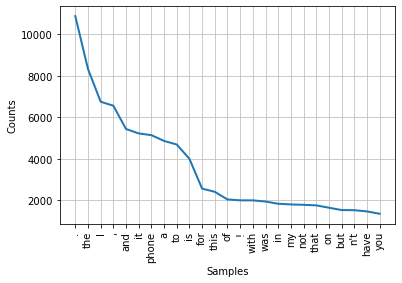

<AxesSubplot:title={'center':'word occurences distribution'}, xlabel='word occurrence', ylabel='probability density'>

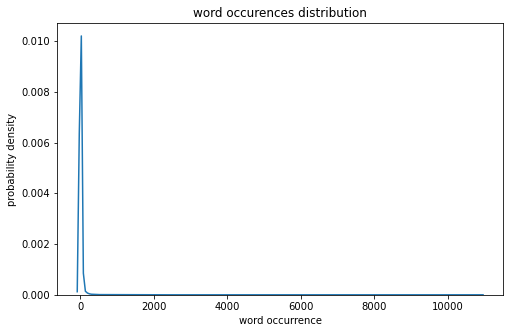

In [30]:
# Plot the distribution of words
# We import the method FreqDist
from nltk import FreqDist

# We need to pass to FreqDist the complete flattened word vector, not only the unique elements
freqDist = FreqDist(flatten_reviews_train)
# We print the 20 most common elements
print(freqDist.most_common(20))

# We create a normal plot that will allow us to the the tendency of the word counts
freqDist.plot(25, cumulative=False)
plt.show()
plt.figure(figsize=(8,5))
#Labeling features for readibility
plt.xlabel('word occurrence'); plt.ylabel('probability density'); plt.title('word occurences distribution')

# We create a vector containing the word count for each element to create a distribution plot
full_counts = [x[1] for x in freqDist.most_common()]
# Distribution plot
sns.kdeplot(full_counts)

As we can see in the first graph, the most common character is ".", which is not even a word. At this point, it is clear that some cleaning in our data set is still needed aa having punctuations as one of the most representative elements in the input set is very problematic. Some of the other most common words, like "and", "to", "with", etc., are known as Stop Words and are normally also eliminated as they have no real embedded meaning. This type of tokens will be erased further during this analysis before feeding our classification models. 

#### Question 5
##### Maximum lenght and only-one appereances

Another charactristics of our datasets that might be interesting to retrieve are how many characters does the longest word have and which words only appear once.

In [10]:
# To return the vocabulary word with the highest length and its corresponding length, we will use the method max by using the
# length of each word as the count criteria

max_len=max(flatten_reviews_train, key=len)
print(max_len, ':', len(max_len))

//forum.xda-developers.com/lg-g3/help/lost-usb-connection-mode-t2847857Going : 76


As we can see below, the longest token observed is some sort of website adress which got a space missing between it and the next word, so they are pasted together. The lenght of the total token in 76. This kind of information could be a problem further in our analysis

In [31]:
# This is an alternative way to find the longest token, this method uses a loop which might be less efficient but it allows to 
# search for other tokerns besides the one having the maximum lenght

maxlen = max(len(word) for word in flatten_reviews_train)
[word for word in flatten_reviews_train if len(word) == maxlen]

['//forum.xda-developers.com/lg-g3/help/lost-usb-connection-mode-t2847857Going']

In [32]:
# Now, to find the number of words in the vocabulary that appear only once in the reviews we will use the method Counter fro
# the package collections

import collections
from collections import Counter
wordcounts = Counter(flatten_reviews_train) #This functions helps to count the appereances per word within the vocabulary
a, b = zip(*wordcounts.items()) #The zip function helps to access the elemnts and its count
# Then we just create a DataFrame containing the words and their appereances
appereances = pd.DataFrame(data=[np.array(a),np.array(b)], index=['Word','Appereances']).T
appereances[appereances['Appereances']== 1] # Here, we consider only the words appearing once

,Word,Appereances
5,👌👍,1
49,wrong.1,1
51,breeze2,1
53,easy3,1
56,vibrant4,1
...,...,...
13094,👎,1
13095,booted,1
13096,beofre,1
13097,silenced,1


Here, we created a DataFrame, containing all the words and its count. We can see here that out of the 13,099 elemnts comprising our vocabulry, 7,273 appear only once. These words might not offer much information given that they are very specific.

As we have seen so far, our vocabulary for the train test, has a lot of outlayers, several punctuations, stopwords, lower and upper case differences, among other issues. In order to use this vocabulary to train our classification models we will need to deal with this problems.

#### Question 6
##### Building a vocabulary for the test set

Now, we will build a vocabulary list for the test set as we did for the test set. The steps we will follow are very similar to those followed so far.

In [33]:
# Tokenized the test reviews

reviews_tokenized_test = [word_tokenize(review) for review in test['Reviews']]
for sentence in reviews_tokenized_test[:5]: print('%s \n'%sentence)

# Here, we tokenize the reviews contained within the test set, in order to
# to be able to manipulate the test set at a word/element level.

['The', 'speed', 'of', 'this', 'tablet', 'is', 'unreal', '!', 'It', 'is', 'by', 'far', 'the', 'fastest', 'I', "'ve", 'had', 'my', 'hands', 'on', '.', 'The', 'UI', 'is', 'very', 'responsive', 'and', 'flows', 'between', 'apps', 'as', 'smooth', 'as', 'butter', '!', 'I', 'believe', 'the', 'Quadrant', 'score', 'was', 'around', '22,000', '!', 'However', ',', 'I', 'think', 'mine', 'may', 'be', 'faulty', '...', 'The', 'battery', 'life', 'is', 'subpar', 'and', 'even', 'my', '3', 'year', 'old', 'Acer', 'A700', 'has', 'more', 'than', 'twice', 'the', 'run', 'time', 'under', 'the', 'same', 'load', '.', 'I', "'m", 'seeing', 'around', '4', '-', '5', 'hours', 'of', 'actual', 'use', 'before', 'the', 'battery', 'drops', 'below', '25', '-', '30', '%', ';', 'below', 'that', ',', 'it', 'drains', 'very', 'rapidly', '.', 'That', 'is', 'with', '1', '-', '1.5', 'hours', 'of', 'games', 'and', 'the', 'remaining', 'time', 'watching', 'movies', 'or', 'web', 'surfing', '.', 'I', "'m", 'finding', 'myself', 'having',

In [34]:
# Test vocabulary creation

flatten_reviews_test = [item for sublist in reviews_tokenized_test for item in sublist]
unique_words_test = list(set(flatten_reviews_test))
len(unique_words_test) 

# As we did before, the flatten the data set in order to extract the implicit vocabulary.

5225

As it would be expected, the vocabulary of the test set (5,225 elements) is smaller than that of the train set (13,099)

#### Question 7
##### Train vs Test

Now, we will try to assess, how many of the words contained in the test set are not present in the train set. Hopefully, we won't get a high number.

In [35]:
# Here we will try to see which words that are present in the test set of reviews are also present in the train vocabulary

contained=[]
for words1 in unique_words_test:
    for words2 in unique_words_train:
        if words1==words2:
            contained.append(words1)

len(contained)

3786

Here, we obtained through a double loop, which are the words from the test vocabulary that are contained within the train vocabulary

In [36]:
# With this formula we can check that all the elements found above are actually
# contained in the train sample. As, the words were obtained from the test sample
# they will be contained in the test vocabulary, so no aditional check needed.

all(elem in unique_words_train for elem in contained)

True

In [38]:
# Lastly, we created a new list out of the train vocabulary droping
# those elements contaied in both, the train and the test, vocabularies

non_contained = [ele for ele in unique_words_test if ele not in contained]
len(non_contained)

1439

Out of the 5,225 words contained in the test set, there are 1,439 words that are not present in the test set, which accounts for 27.5% of the test sample. This number is not small, but we consider it is small enough to allow us to implement our classification method as almost 3/4 of the test sample will be used to train the model.

## 2. Main Course: Review Classification with Logistic Regression and BoW text encoding

Now, we will apply the Logistic Regression classification model by applying the Bag of Words method to our sample to process our data. All the work done before will serve as a basis to pepare our data.

### 2.1. Defining X (features vectors) and y (labels) sets

We will now start to implement our classification methods. To do so, We start by storing our features and labels in X_train, y_train, X_test and y_test. Then, we will try to predict the ratings that go from 1 to 5 based on the written reviews. We will transform our ratings so that the scale starts in 0. This means that, now, the ratings will range from 0 to 4. This will allow us to define the categorical cross-entropy as a loss function for the Neural Network that we will be training. The categorical cross-entropy is defined as follows:

$$C=-\frac{1}{m}\sum_{j=1}^{m}\sum_{k=1}^{K}y_{ik}\ln{p_{ik}}$$

Where K are the different possible ratings and m is the number of data points in the train sample.

In [39]:
# We define X_train and y_train from the train sample obtained above with the reviews for each purchase and we
# perform some adjustements. First, we assing a blank space whenever we dont count with a written review
X_train = train['Reviews'].fillna("")
# We transform the ratings by substracting 1 to each rating to have labels that starts at 0 
# to use sparse categorical cross-entropy as loss function for the NN training
y_train = train['Rating']-1
X_train.shape, y_train.shape

((5000,), (5000,))

In [40]:
# We perform the same step for the test set defined above
X_test = test['Reviews'].fillna("")
# Substract 1 to rating to have labels that starts at 0 
# to use sparse categorical cross-entropy as loss function for the NN training
y_test = test['Rating']-1
X_test.shape, y_test.shape

((1000,), (1000,))

#### Question 8

#### Clean Function

We will define a function that takes some text and return the cleaned version of it, considering the steps explained in the first part of this question, so that the processed data is ready to use it as an input for our classification method.

In [41]:
## We are going to define a function called "clean_text" which takes text as input and
## returns a clean text after several steps.
## We will explain all the different steps along the process. 


import nltk
nltk.download('stopwords') # This steps download a pre-built library of stop words as defined above, i.e. words with no real meaning
import string 
from nltk.tokenize import WhitespaceTokenizer # We import the method to tokenize the text
from nltk.stem import WordNetLemmatizer # We import the methdo to lemmatize the text. Lemmatize refers to a method that converts words to their root which helps reducing
                                        # in an important fashion the amount of words within a large text. This is useful as congugated words have the same meaning but in 
                                        # a simple tokenization they are accountes as if they were different words.
from nltk.corpus import stopwords # We import the method to remove the stop words

# In this step, we import a library containing the normal emojis found in this types of reviews. This will allow us to indentify them and remove them from the reviews as their
# meaning is normally redundant
try:
    import emoji
except:
    !pip install emoji
    import emoji


def clean_text(text):
    # The first step will be to remove from our data sample any emoji for the reason exposed above
    text = [c for w in text for c in w if c not in emoji.UNICODE_EMOJI]
    text = ''.join(text)
    
     # We convert all text to lower case so that we do not double count words that are written both with upper and lower case, as they are the same word
    text = text.lower()
    
     # We remove all the punctiation symbols as they do not have any real meaning associated with them
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
     # We remove any numbers found in the text as they information added regarding client satisfaction can be misleading
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
     # We, then, remove the stop words as they do not have any real meaning embedded
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
     # We remove the blank spaces, for examples the ones created when removing the emojis
    text = [t for t in text if len(t) > 0]
    
     # We lemmatize the words. The explanation of the process is above in this chunk of code
    text = [WordNetLemmatizer().lemmatize(t) for t in text]
    
     # We remove any word having less that two characters as they normally do not add much information
    text = [t for t in text if len(t) > 2]
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# We then used the defined Clean function to X_train and X_test which were previous preprocessing
X_train_cleaned = [clean_text(r) for r in X_train]
X_test_cleaned = [clean_text(r) for r in X_test]

#### Question 9

##### Logistic Regression

In this step, we will fit a logistic regression model. In order to be able to pass our data sample to the neural network in a more efficient manner we will transform our data into matrix using a Bag of Words (BoW). The Bag of Words is representation of the vocabulary from a text (the one containing the unique words) in which an index is assinged to each unique word. We, then, can use this vector to represent each review as a vector indicating how much times each word contained in the Bag of Words appears in it, resulting in a matrix of NxM, where N is the number of reviews and M is the number of elements in the Bag of Words.

In [50]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression # We import the logistic regression model
from sklearn.feature_extraction.text import CountVectorizer # We import the CountVectorizer method which allows us to transform our data set into a matrix representation based on the BoW
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report # We import a model that will help us to proved clear performance statistics of our classification model
# Build, Fit and Evaluate a model using the previous preprocessing
from sklearn.metrics import accuracy_score # We import a model that will give us the accuracy of the predictions made

cv = CountVectorizer()

# Here, we create the Bag of Words associated to our data sample. This method will, implicitly, extract the vocabulary out of the data sample and create a BoW from it. We do this
# using the train vocabulary and then we use the resulting BoW to transform both the training and the test sample
cv.fit(X_train_cleaned)

# We transform our reviews into a vectorized form of the BoW. The resulting object is a NxM matrix
X_train_encoded = cv.transform(X_train_cleaned)
X_test_encoded = cv.transform(X_test_cleaned)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_encoded, y_train) # We fit the logistic regression to our data
y_pred = lr.predict(X_test_encoded) # We generate the predictions to compare with the test sample

# We finally, print the perfromance statistics
print('accuracy score: ',accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))


# As explained above, the CountVectorizer allow us to represent the data sample in terms of a Bag of Words. Each review will be a vector with the same number of elements contained 
# in the BoW. The elements are the number of times that each word appears in the text. If the method CountVectorizer is set to Binary=True, then all the elements that are different
# to zero will be converted to 1. This might be useful in a binary classification model, meaning that you have only two classes or when how much the words appear in the text do not
# add much information to the classification task being done. In our case, we have more than two classes and the words frequency do matter, so binary should set as False. 

accuracy score:  0.657
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       156
           1       0.12      0.21      0.15        28
           2       0.13      0.20      0.16        45
           3       0.23      0.44      0.30        84
           4       0.91      0.74      0.81       687

    accuracy                           0.66      1000
   macro avg       0.40      0.45      0.41      1000
weighted avg       0.75      0.66      0.69      1000



#### Question 10

##### Interpreting the results

As we can see from the overall accuracy result, which shows what percentage of the predicted value were correctly classified, is pretty low at 65.7%. But, then, while looking at the precision score, which reflects the proportion of the values well classified to each class to both the well and incorreclty classified data points at the corresponding class, we can see that the model is very good at capturing the data points belonging to the fifth class (5 stars) and first class, while it does not do very well in differentiating the data points belonging to the middle classes. 

This is consistent with what is observed in the recall and f1-score. The former reflects the proportion of correctly classified points to each class to both the correctly classified points and the points that should have been classified into the corresponding class but actually were not. The latter is a combination of both precision and recall and it is a more balanced performance metric than the accuracy, as it is not overly focused on correctly classified points as the accuracy metric. 

This point can be further stressed by comparing the macro average and the weighted average. The macro averages the metrics in an equally-weighted fashion, while the latter does so taking into account the proportion of data belonging to each class. The weighted average increases importantly as most of the reviews are focused on the last class. This reflects that our data set is quite unbalanced and, therefore, the model trained on such data gets very good at predicting the dominating class but it does not do so good in the other classes.

Below, we will explain how to compute each of the measures discussed here for the last class.

C:\Users\apala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\apala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\apala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

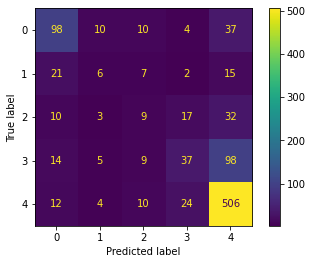

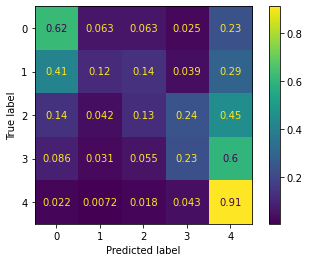

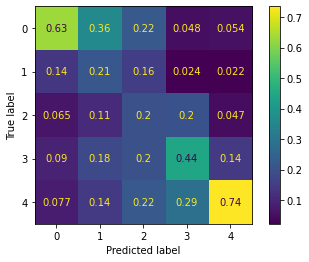

In [23]:
# Print/plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test_encoded, y_test);
plot_confusion_matrix(lr, X_test_encoded, y_test, normalize='true');
plot_confusion_matrix(lr, X_test_encoded, y_test, normalize='pred')

### TO BE COMPLETED BY STUDENTS.

We created the confussion matrix, which allow us to see how the predictions were classified against how they should have been classified. We can use the data contained in them to compute the scores explanied above. For this, we need to look at the first matrix. The first step will be to compute the following metrics:

- $True Positives = 506$
- $False Positives = 12 + 4 + 10 + 24 = 50$
- $True Negatives = 1000 - 506 = 494$
- $False Negatives = 37 + 15 + 32 + 98 = 182$

Now, we can see how to compute each measure:

- $Precision = \frac{TP}{TP+FP} = \frac{506}{506+50} = 91.00\%$
- $Recall = \frac{TP}{TP+FN} = \frac{506}{506+182} = 73.54\%$
- $f-1 score = 2*\frac{Precision*Recall}{Precision+Recall} = 2*\frac{0.91*0.7354}{0.91+0.7354} = 81.35\%$

The second and the third matrix have the same information than the first matrix but scaled by the true value and the predicted value, accordingly. To understand it a little better, we can notice that the diagonal of the second matrix is equal to the precision score to each matrix and the diagonal of the second is equal to the recall score. 

#### Question 11

##### There was no question 11

#### Question 12

##### TfidfVectorizer

Now, we will repeat the same procedure as before but with a different method of vectorizing the data sample. The method is called TF-IDF, in which:

- TF stands for Term Frequency the number of times a specific element appears in each review
- IDF stands for Inverse Document Frequency the number of documents containing the element

$$IDF(t) = 1+ln\Big(\frac{1+N}{1+DF(t)}\Big)$$

$$TF-IDF = TF*IDF$$

So, the result of such vectorizing procedure will be a matrix just as in the Bag of Words method, but instead of having the counts of each word in each review as element, we will have the TF-IDF statistics. This will help us to give more importance to words that are hihgly present in some reviews even if it is not  that present overall the set of reviews, which is not possible using only the BoW.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

# Here, we create the Bag of Words associated to our data sample. This method will, implicitly, extract the vocabulary out of the data sample and create a BoW from it. We do this
# using the train vocabulary and then we use the resulting BoW to transform both the training and the test sample
tf_idf.fit(X_train_cleaned)

# We transform our reviews into a vectorized form of the BoW. The resulting object is a NxM matrix
X_train_encoded_2 = tf_idf.transform(X_train_cleaned)
X_test_encoded_2 = tf_idf.transform(X_test_cleaned)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_encoded_2, y_train) # We fit the logistic regression to our data
y_pred = lr.predict(X_test_encoded_2) # We generate the predictions to compare with the test sample

# We finally, print the perfromance statistics
print('accuracy score: ',accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

# As we explained before, the TF-IDF vectorizer goes one step further than Bag of Words by giving more importance to the most frequent elements within the vocabulary.
# Nevertheless, it is important to consider the meaning of some paramenters within the TfidVectorizer method.
# n_gram -> instead of searching the frequency of specific words, with this parameter we can look for the frequency of specific combinations of words. Basically, instead of separating 
#           by word, we will separate by groups of two words (in the case of n being 2). So, that one portion of text like "Product good performance" coming from "The product has
#           good performance" after cleaning, will be separeted in "product good" and "good performance" rather than "product", "good", "performance". In this example, we can see that
#           the the two bigrams offer a lot of meaning, while from the three words only one of them does. 
# min_df -> it sets a minimum frequency for each word to be considered part of the words vector
# max_df -> it sets a maximum frequency for each word to be considered part of the words vector
# binary -> it will transform all the non-zero frequency counts in the tf to 1 (not the TF-IDF number)

accuracy score:  0.677
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       181
           1       0.04      1.00      0.08         2
           2       0.01      0.25      0.03         4
           3       0.14      0.45      0.21        51
           4       0.96      0.70      0.81       762

    accuracy                           0.68      1000
   macro avg       0.38      0.61      0.36      1000
weighted avg       0.87      0.68      0.75      1000



As we can see, the weighted average of all the scores improved compared to the previous excersice, in which we obtained 0.76, 0.66 and 0.69, even if the overall accuracy did not changed a lot (previous figure was 0.657). This improvement may be explained for the fact that we can give more importance to those terms that are highly present in some reviews. This information was lost in the example in which we used only BoW. 

Nonetheless, is important to notice that the prediction perfromance in the middel ratings actually went a little down except from the recall measure for the second rating, which went all the way up to 1.00 implying that no false negatives were classified in that class. Even if this last statement seems very good, it enough to see that this was a specific case given that this improvement for this class was not observed in the other performance measures. 

#### Question 13

#### Additional paramaters - Logistic Regression

In this question we will explain more in detail what does the parameters "penatly" and "C" within the logistic regression model imply. Before diving into the concepts, we need to remember that a logistic regression will try to stablish a linear relationship between some features and the label(s). To do so, it calculates the coefficients to each feature so that the loss fucntion, normally the Mean Squared Error, is minimized. Nonetheless, there could be some flaws within the data sample leading to some flaws in the fitting of the model. One of the problems may be having coefficients that are too big in comparison to others, gaining maybe too much relevand in the model. There are some methods that provide a solution for this kind of problems. They are called regularization methods and the most populares are Ridge and Lasso. Ridge method will penalize the loss function by adding the squared magnitude of the coefficients.

$$Ridge -> \sum_{n=1}^{N}(y_{i}-\hat{y}_{i})^2 + \lambda\sum_{n=1}^{N}\beta_{i}^2$$ 

On the other hand, the Lasso method will penalize by adding the absolute value of the coefficient to the loss function.

$$Lasso -> \sum_{n=1}^{N}(y_{i}-\hat{y}_{i})^2 + \lambda\sum_{n=1}^{N}|\beta_{i}|$$

This will implicitly force the optimization method to prefer coefficients thar are not too large given that they increase the loss function. An imporant characteristic of Lasso is that it will try to shrink the less important features coefficients to zero leading to a elimination of the less important features. This can be very useful when working with large feature space.

Then, the penatly parameter within the logistic regression tells which method of regularization to use. Another interesting paramenter is the C, which is the inverse of the regulatization strength. This can be taught as the inverse of lambda. When lambda is zero, there is no regularization at all. This will mean a high C. When C is small, meaning a high value of lambda, the regularization strenght is high and, therefore, the model will be giving a high weight to the penalty in the loss function optimization. 

## 3. Dessert: Review Classification with Neural Networks and Word Embedding

In this part of question, we will explore the Neural Networks approach and compare it to the results we obtained from the slighlty more simplistic linear regression approach. One of the main differences is that now we will using the keras library instead of the sklearn one. Before, we used the CountVectorizer and TdifdVectorizer to transform our reviews into a vectorized form so that we could extract features from them. The equivalent method in keras library is called Tokenizer, which has less options but it allows to use the availables GPUs to make the processing faster. 

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer # We import the Tokenizer method to vectorize the reviews

#### Question 14

##### Tokenizer method

In [57]:
# Create an instance of the Tokenizer class 
tokenizer = Tokenizer() 

# Here, we apply the vectorizaion method to our data sample. This method will, implicitly, also extract the vocabulary out of the data sample and create a vocabulary out of it.
# We will, then, use the resulting BoW to transform both the training and the test sample
tokenizer.fit_on_texts(X_train_cleaned) 

# We transform our reviews into a vectorized form of the BoW. The resulting object is list of sequences
sequences_train = tokenizer.texts_to_sequences(X_train_cleaned) 
sequences_test = tokenizer.texts_to_sequences(X_test_cleaned) 

So far, we stated that the basic idea behind Tokenizer and the other vectorization methods is the same. This is true but there is an important difference that we need to bear in mind. We can pass as a parameter to the method differents modes like binary, counts, frequency, TD-IDF, so to have a similar result as before. The problem is that both CountVectorizer and TdidfVectorizer should yield the same number of features as they create a matrix in which the number of columns is the number of words in the vocabulary. 

On the other hand, Tokenizer will create a list of sequences consisting on the representation of each word within the review. This means that we will only have the non zero terms, only a sequence of the representations of the words within each reviews. We can understand this as each review having different number of elements, while the previous methods will force every review to have the seme number of elements by adding zero to the non present words. 

#### Question 15

In [58]:
print(max([len(i) for i in sequences_train]))

512


In [59]:
print(max([len(i) for i in sequences_test]))

519


With the above two chunk of codes we can extract how many words does the longest review has in both the train set and the test set. The number of elements in each of them is 512 and 519, accordingly. We can be sure that there are only words in there as we have previously cleaned the data set before hand and because the Tokenizer method do account for punctuation terms my supressing them. 

#### Question 16

##### Pad_Sequence method

Now, we will introcue a method that allows to overcome the fact of each review having different number of elements. This method is call padding. It consists of adding zeros where there are no elements. This will lead to all reviews having the same number of elements. Nonetheless, we need to specify how long the resulting sequences will be. If we do not do this, the resuling vectos will be as long as maximum number of elements in the longest reviews. Therefore, it we would have vectors with a lenght of 512 in the train set and 519 in the test set. We would like them to have the same lenght, so we take the maximum of the two and pass that as parameter to the pad_sequence method. We will therefore get a matrix of size NxM as in the previous vectorizing methods.

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # We download the padding method
maxlen = 520 
data_train = pad_sequences(sequences_train, maxlen) # We apply the padding method to our train set
data_test = pad_sequences(sequences_test,maxlen) # We apply the padding method to our test set
print(data_train.shape) 

(5000, 520)


#### Question 17

In this part of the question we will show how to acess the vocablary built by the Tokenizer method. Tokenizer creates a dictionary object comprising the vocabulary elements and the index assign to each element. In order to access it you use the word_index method as shown below.

In [74]:
list(tokenizer.word_index .items())[:10]

[('phone', 1),
 ('great', 2),
 ('good', 3),
 ('work', 4),
 ('one', 5),
 ('like', 6),
 ('battery', 7),
 ('screen', 8),
 ('use', 9),
 ('love', 10)]

In [62]:
word_index = tokenizer.word_index

# How many words are there actually?
nb_words =len(tokenizer.word_index)
print(nb_words)

7848


In the code above, we obtained the lenght of the dictionary created by Tokenizer. In this way we can now how many words are there in our vocabulary. Next, we will build a neural network to process our data. The architecthure of our neural network will consist of one embedding layer, one flatten layer, one hiden layer with 16 neuros and the output layer, which will have 5 neurons, one for each possible rating. The activation function of the output layer will be a soft max activation function, which is usually used in multicategorical classification method. 

We will train this neural network in order to be able to predcit ratings out of the reviews from the test set. It is important to expain before hand what the embedding layer will be doing. Embedding is a concept referring to a word represention as a vector. The idea is that represent each word a a vector of numbers so that our neural network can easily identify each word. A neural network cannot recognize a word as a word, but it can do so as a vector of numbers. There are multiple differents embedding methods. In this case, we will let the neural netwokr to choose the embedding representation that it founds to be optimal. 


#### Question 18

In [69]:
embedding_dim = 50

# In order to apply the embedding method, we need to choose before hand the length of the vectors that will be representing each words. In this case, we will be choosing
# 50 as the length of our vectors. 

#### Question 19

##### Artificial Neural Network construction

Let us construct the artificial neural network as specified above. As stated above, the embedding layer will transform each word into a vector of 50 elements as we will pass the embedding_dim paramenter specified above to the ANN. So, each review that was previously a vector containing 520 elements after the padding, will be transformed into a matrix of size 520x50, as each element/word, will be itselt a vector of size 50. 

In [89]:
# Build neural network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()

model.add(Embedding(nb_words+1, 
                    embedding_dim, 
                    input_length=maxlen)) 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

# The main inputs into a embedding layer are:
# input_dim-> in which we specify the number of words contained in the vocabulary. In our case, we specified if as the nb_words retreived above plus one because the layer takes a range
#            of [0,nb_words+1), meaning that the last element is excluded.*********************************************
# output_dim-> the size of the vector we want to represent each word. In our case is 50
# embeddings_initializer-> We can choose a predefined initializer method to start the optimization method. This will apply a predefined method to choose the word representation
# embeddings_regularizer-> It is a regularizer method that we will apply to the output matrix. This will help us to avoid an overfitting on the overall model coming from the embedding
#                         weigths.
# embeddings_constraint-> This are restrictions set on the model that need to be met when choosing the embedding weights.
# mask_zero-> This helps to communicate to the model if the 0 are coming from a previous padding method.
# input_length-> This is the length of reviews as a vector. In our case is 520. When connecting a Flatten and Dense layers to the embedding layer, it is required to specify this
#                this paramenter as the output shape won't be able to be computed otherwise.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 520, 50)           392450    
                                                                 
 flatten_5 (Flatten)         (None, 26000)             0         
                                                                 
 dense_9 (Dense)             (None, 16)                416016    
                                                                 
 dense_10 (Dense)            (None, 5)                 85        
                                                                 
Total params: 808,551
Trainable params: 808,551
Non-trainable params: 0
_________________________________________________________________


#### Question 20

##### Parameters derivation

The number of paramenters in the first dense layer, the hidden layer is calculated to be 416,016. We will explain next how to get this number. First we need to stablish the following:

- As we explained before, the embedding layer will transform the 520 vector representation of each review to a 520x50 matrix
- The flatten layer will then transform this into a vector of size $520*50=26,000$
- Then, the dense layer will receive this 26,000 elements as inputs in each neuron. Each neuron will then have to find the optimal weight for each 26,000 elements, i.e. 26,000 weights, plus the corresponding bias term. Then, the number of paramenters at each neuron will be 26,001. Finally, as we have 16 neuros, the number of total paramenters at this point is $26,001*16=416,016$

Next, the number of parameters in the output layer is computed as 85. This can be easily found as follows:

- The previous hidden layer, has a ReLu actiavtion fuction wich will be taking as an input $z=\sum_{i=i}^{26,000}w_{ij}*x_{i}+b_{j}$ and will be outputing $x_{i}$ if $x>0$ or 0 if $x<0$
- So, the total output of the previous layer will be 16 elements. 
- So, each neuron will have to find the optimal weight of each of this elements, i.e. 16 weights, plus the bias term. This means that we will have 17 parameters at each neuron. As we have 5 neuros, then, the number of paramentes is $17*50=85$ 

##### 'SparseCategoricalCrossentropy' vs 'CategoricalCrossentropy'

As we explained above, the loss function that we will favour using is the Sparse Caterofical Cross Entropy loss function. We can use this loss function given that our date is not hot encoded. What we mean is that the label is not a matrix in which each rating is a vector in which each element represents a class. If this were the case, each review would be containing zeros except from the element corresponding to class to which the rating corresponds. This is know as hot econded data. In our case, each ratings has a number ranging from 0 to 4, so instead of being a vector, each rating is an integer. This makes the optimization problem more fast to solve. Both, categorical cross entropy and sparse categorical cross entropy have the same loss function:

$$J(w)=−\frac{1}{N}\displaystyle\sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij} log(\hat{y_{ij}})$$ 

Where: 

* $w$ refers to the model parameters, e.g. weights of the neural network
* $y_i$ is the true label
* $\hat{y_i}$ is the predicted label
* $K$ is the number or classes or ratings

The difference is that $y_{i}$ is a vector in the case of the Categorical Cross Entropy case, while in the Sparse Categorical Corss Entroppy it is an integer. After this brief explanation, we will proceed to train the neural network built above.

In [97]:
model.compile(optimizer='adam', # We specify which Gradient Descent to use while performing the optimization of the model
              loss='SparseCategoricalCrossentropy', # We specify what loss function to use
              metrics=['acc'])

In [98]:
# We fit the model to our data sets built in Question 16

history = model.fit(data_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(data_test, y_test))

Epoch 1/10
157/157 [==============================] - 2s 10ms/step - loss: 0.1995 - acc: 0.9458 - val_loss: 1.3952 - val_acc: 0.6330
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1750 - acc: 0.9496 - val_loss: 1.4967 - val_acc: 0.6400
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.1567 - acc: 0.9550 - val_loss: 1.5198 - val_acc: 0.6360
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1441 - acc: 0.9568 - val_loss: 1.6037 - val_acc: 0.6290
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1362 - acc: 0.9596 - val_loss: 1.7025 - val_acc: 0.6380
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1279 - acc: 0.9616 - val_loss: 1.7254 - val_acc: 0.6080
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1234 - acc: 0.9612 - val_loss: 1.7617 - val_acc: 0.6300
Epoch 8/10
157/157 [==============================] - 1s 9ms/step - loss: 

#### Question 21

##### argmax function

In [102]:
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1)

In this step, we use the trained model to predict the the rating to each reviews within the test set. We need to remember that the activation fuction of the output layer was a softmax function defined as follows:

$$p(k|x) = \frac{exp^{z_{k}^{(L)}(x)}}{\sum_{j=1}^{K}exp^{z_{k}^{(L)}(x)}}$$

Where k represents the class or the ratings. This means the the softmax option will compute a probability for the element received to belong to each class. In our case, there were 5 classes thats why the output of our output layer in the neural network defined above was set to 5. 

This also means that each predicted label, $\hat{y}_{i}$, will be a vector of 5 probabilities. What we care is only the highest probability out of the 5 obtained, which suggests that the review will most likely lead to the corresponding class or rating. With the function argmax in the above chunk of code we get the index of the highest probability within each probability vector. This will transform our predicted probability matrix to a vector containing the predicted label for each review. 

In [103]:
print('accuracy score: ',accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

accuracy score:  0.631
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       166
           1       0.14      0.18      0.16        38
           2       0.10      0.17      0.12        41
           3       0.12      0.33      0.17        57
           4       0.89      0.71      0.79       698

    accuracy                           0.63      1000
   macro avg       0.38      0.40      0.38      1000
weighted avg       0.74      0.63      0.68      1000



<AxesSubplot:>

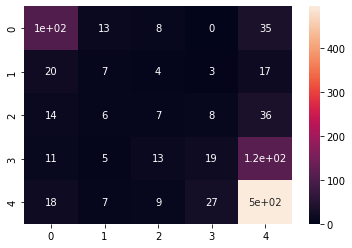

In [104]:
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

<AxesSubplot:>

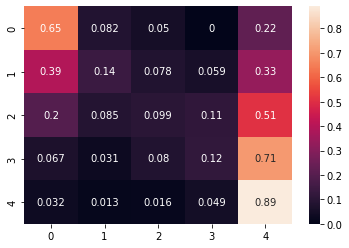

In [105]:
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),annot=True)

<AxesSubplot:>

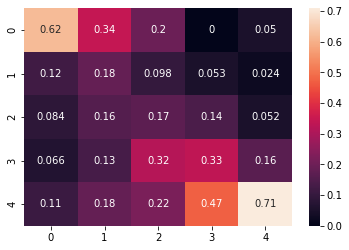

In [106]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='pred'),annot=True)

#### Question 22: Interpret the results for this model (accuracy score, confusion matrix).

Finally, we computed the performance measures of the new model. This can be compared with the results obtained on the models above in which we had:

- Weighted Average from Logistic Regression BoW -> Precision:0.75 , Recall: 0.66, f-1:0.69
- Weighted Average from Logistic Regression TF-IDF -> Precision: 0.87, Recall: 0.68, f-1:0.75
- Weighted Average from ANN -> Precision: 0.74, Recall: 0.63, f-1:0.68

We can see that, even though, the ANN perfromance is the lower of all, it is super close the one obtained from the logistic regression based on the Bag of Words vectorization method. This makes sense as the tokenization method from the keras library, after padding, should yield an equivalent vector represantion to the one we obtained with the CountVectorizer method. What is interesting is that the embedding layer seems to do a good job, or at least similar, compared to the Bag of Words method. It also makes sense that the ANN has a worst performance compared to the TD-IDF word vectorization method given that, as we stated above, it captures more information by assinging more weight to those words that are specially present in some reviews despite the fact that they might not be very present in the overall set of reviews. An interesting additional step would be to ask the Tokenizer method to use a TD-IDF criteria to form the review's vector representation. Results should improve and, maybe, the ANN will be better at capturing this additional information than the more simpler logistic regression approach. Finally, if we observe the color distribution of the confussion matrices obtained now and before we can notice that is basically the same and that the worst performance is still concentrated in the middle raitings area. 